<a href="https://colab.research.google.com/github/HamidBekamiri/Econometrics-II/blob/main/06_M3_1_LSTM_Tutorial_v2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objective of this tutorial

Our goal in this tutorial is to provide simple examples of the LSTM model so that you can better understand its functionality and how it can be used in a domain.

After completing this tutorial, you will know:


```
1. What is an LSTM (Long Short-Term Memory) network?

2. How do LSTMs work, and how does their structure compare to that of traditional RNNs?

3. What are the purposes and benefits of using LSTMs for tasks such as sequence generation?

4. How to implement an LSTM in PyTorch code?

5. How to train an LSTM for a specific task?

6. What are some common challenges and pitfalls to avoid when working with LSTMs?

7. What are the differences between various types of RNNs, including RNNs and LSTMs?
```




#Long Short-Term Memory (LSTM) with PyTorch

LSTMs are a type of RNN, so you will gain a better understanding of LSTMs by understanding RNN concepts.


## A quick recap on RNNs

By processing inputs sequentially, RNNs calculate outputs by considering the context of previous inputs. As a result, the neural network can carry information over different time steps rather than keeping each input as an independent variable.

Due to the problem of vanishing/exploding gradients, RNNs are unable to work with longer sequences and hold on to long-term dependencies.


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN_Vanishing_Exploding.png" width="700">

#### Exploding gradient problem
```
- The gradients will be exploded if the gradient formula is deep (large T−t) and a single or multiple gradient values becoming
very high (if Wh2h > 1).

- This is less concerning than vanishing gradient problem because it can be easily solved by clipping the gradients
at a predefined threshold value.
```

#### Vanishing gradient problem
```
- The gradients will be vanished if the gradient formula is deep (large T−t) and a single or multiple gradient values
becoming very low (if -1 < Wh2h < 1).
- Calculating the error after several time step with respect to the first one, there will be a long dependency.
- If any one of the gradients approached 0, all the gradient would rush to zero exponentially fast
due to the multiplication of chain rule.
- This state would no longer help the network to learn anything which is known as vanishing gradient problem.
```
> Below is the effects of applying a sigmoid function over and over again, it became very flattened with no detectable slope where its gradient become close to 0.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN_Vanishing.png" width="300">



Due to these issues, RNNs are unable to work with longer sequences and hold on to long-term dependencies, making them suffer from “short-term memory”.

This problem can be solved in 3 ways:.
```
- Activation Function (ReLU instead of Tanh)
- Weights initialization
- Changing Network Architecture
```

This section will focus on the 3rd solution that is changing the network architecture. In this solution, you modify the architecture of RNNs and use the more complex recurrent unit with Gates such as LSTMs or GRUs (Gated Recurrent Units).

## LSTM: How does it help?

LSTMs are a special type of Neural Networks that perform similarly to Recurrent Neural Networks, but run better than RNNs, and further solve some of the important shortcomings of RNNs for long term dependencies, and vanishing gradients.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/RNN-LSTM.png" width="700">



### Long-term Memory

The key building blocks behind LSTM are a cell state known as Long-term Memory and three different types of gates. Information is added or removed through these gates. Let's check these structuers:

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_Gates.png" width="700">

> Cell state is a memory of the LSTM cell and hidden state (cell output) is an output of this cell. Cells do have internal cell state, often abbreviated as “c”, and cells output is what is called a “hidden state”, abbreviated as “h”. Regular RNNs have just the hidden state and no cell state.


These gates are called the Input Gate, the Forget Gate, and the Output Gate. There are many variants to the names of these gates; nevertheless, the calculations and workings of these gates are mostly the same.

> Forget Gate: The forget gate decides which information from the long-term memory should be kept or discarded.

> Input Gate: The input gate decides what new information will be stored in the long-term memory. It only works with the information from the current input and the short-term memory from the previous time step. Therefore, it has to filter out the information from these variables that are not useful.

> Output Gate: The output gate will take the current input, the previous short-term memory, and the newly computed long-term memory to produce the new short-term memory/hidden state which will be passed on to the cell in the next time step. The output of the current time step can also be drawn from this hidden state.

### How does a Gate work in LSTM?

A gate consists of a neural net layer, like a sigmoid, and a pointwise multiplication shown in red in the figure above.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Sigmoid_pointwise-multiplication.jpeg" width="200">

> Sigmoid is forcing the input between 0 and 1, which determines how much information is captured when passed through the gate, and how much is retained when it passes through the gate. For example, 0 means no information is retained, and 1 means all information is retained.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_cellstate.png" width="500">

> Pointwise multiplication in an LSTM is used to control the flow of information through the network by element-wise multiplying matrices, For instance, the output of the forget gate after applying the sigmoid function is a matrix of values between 0 and 1. When we perform pointwise multiplication of this matrix with the cell state from the previous time step, it determines how much of the past information to retain or forget. A value close to 0 means that the corresponding value in the cell state is mostly forgotten, while a value close to 1 means it is mostly retained.

> Tanh: Unlike the sigmoid function, which outputs values in the range [0,1][0,1], the tanh function is zero-centered, meaning its output ranges from -1 to 1. This ensures that the values within the LSTM cell, specifically the cell state and the hidden state, remain bounded. Bounded values help in preventing the gradients from exploding during backpropagation, which is a common problem in training deep neural networks. The zero-centered property can lead to more efficient learning and faster convergence during training, as it prevents the gradients from always being positive or always being negative, which can cause issues like the vanishing gradient problem

Long story short:

> - **Sigmoid:** Decide which information is relevant.
- **Pointwise Multiplication:** Applied to execute the selection process.
- **Tanh:** Preventing the exploding gradient problem during training by ensuring values and gradients remain within a certain range.

In summary:

> - **Forget Gate:** Decides what information from the cell state should be thrown away or kept.
- **Input Gate:** Updates the cell state with new information.
- **Output Gate:** Decides the next hidden state.

###Structure of LSTM

Now, let’s dig deeper to understand what is happening under the hood. LSTM consists of five different parts:
1. Linear part (Parameters: This includes the weights and biases of the input-to-hidden layer, the hidden-to-hidden layer, and the hidden-to-output layer.)
> *The hidden state and cell state are used to capture the information from the previous time steps, but this information is not relevant after the training process is finished. Therefore, resetting the hidden and cell state parameters to zero ensures that the network starts with a clean slate for making predictions on new, unseen data.*

2. The hidden state (also known as the Short-term Memory)
> *you can think of the hidden state as representing the "short term or working memory" of the network, which is updated at each time step and used to produce the output.*

3. The cell state (also known as the Long-term Memory)
> *you can think of the hidden state as representing the "long term or working memory" of the network, which is updated at each time step and used to produce the output.*

4. Non-Linear part (Activation Function (Tanh and Sigmoid))
> As you can see in the equation above, you feed in both input vector Xt and the previous state ht-1 into the function. Here you’ll have 8 separate weight matrices then apply the Non-linearity (tanh and sigmoid) to the sum of input Xt, previous hidden state ht-1, and cell state ct-1 after multiplication to these weight matrices.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_formula.png" width="800">


5. Fully connected part (Output Layer): Finally, you’ll have the output vector ŷt at the timestamp t.
> <img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence-3.png" width="150">


## LSTM code implementation

Let's get started with Data Preparation for the LSTM  implementation!

In [2]:
# Installing needed packages for the project

install.packages(c(
  "keras3", "tensorflow", "fredr", "gridExtra", "rsample", "dplyr"
))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘RcppTOML’, ‘here’, ‘png’, ‘future’, ‘globals’, ‘warp’, ‘reticulate’, ‘tfruns’, ‘zeallot’, ‘config’, ‘tfautograph’, ‘furrr’, ‘slider’




In [3]:
library(rsample) # Load rsample library
library(scales)  # For rescaling functions
library(keras3)
library(tensorflow)
library(ggplot2)
library(dplyr)


Attaching package: ‘tensorflow’


The following objects are masked from ‘package:keras3’:

    set_random_seed, shape



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Data Preparation

To understand how should we prepare the data for LSTM, we’ll use a simple dataset as a Timeseries Forecasting example. Below is the full sequence of values and their restructuring as a training and testing dataset.

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [4]:
sequential_data <- c(10, 20, 30, 40, 50, 60, 70, 80, 90)
sequential_data

[1] 10 20 30 40 50 60 70 80 90

In [5]:
# Convert sequential_data to a data frame
df <- data.frame(sequential_data)

In [6]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
df_scaled = as.data.frame(lapply(df, normalize))
df_scaled

sequential_data
<dbl>
0.000
0.125
0.250
0.375
0.500
0.625
0.750
0.875
1.000


In [7]:
# Ensure the input is a matrix
df_matrix <- as.matrix(df_scaled)
df_matrix

sequential_data
0.000
0.125
0.250
0.375
0.500
0.625
0.750
0.875
1.000



<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/SequenceDataPerparation.webp" width="400">

In [8]:
n_timesteps <- 3

# Get dimensions of the matrix
n_samples <- nrow(df_matrix) - n_timesteps
n_features <- ncol(df_matrix)

n_samples
n_features

[1] 6

[1] 1



Now, let’s separate the datasets into batches!

<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/Seq_DataPerparation_2.webp" width="100">

In [9]:
# Create empty lists to store X and y
X_list <- list()
y_list <- list()

# Fill the lists with sequences and target values
for (i in 1:n_samples) {
  X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
  y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
}

# Convert lists to arrays
X <- array(do.call(rbind, X_list), dim = c(n_samples, n_timesteps, n_features))
y <- matrix(unlist(y_list), nrow = n_samples, byrow = TRUE)
X
y

, , 1

      [,1]  [,2]  [,3]
[1,] 0.000 0.125 0.250
[2,] 0.125 0.250 0.375
[3,] 0.250 0.375 0.500
[4,] 0.375 0.500 0.625
[5,] 0.500 0.625 0.750
[6,] 0.625 0.750 0.875

0.375
0.500
0.625
0.750
0.875
1.000



*   **X** is an array because it represents a 3D structure **(batch × timesteps × features)**, which is the required input format for LSTM models.

*   **y** is a matrix because it represents a 2D structure **(batch × target values)**, where each row corresponds to one target sequence for each sample.

Implementing code for LSTM and RNN requires sequential data preparation. The data preparation process for these models is visualized here!


<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/sequence.gif" width="600">


In [18]:
univar_rnn_input <- function(df, n_timesteps) {
  # Ensure the input is a matrix
  df_matrix <- as.matrix(df)
  head(df_matrix)
  # Get dimensions of the matrix
  n_samples <- nrow(df_matrix) - n_timesteps
  n_features <- ncol(df_matrix)

  # Create empty lists to store X and y
  X_list <- list()
  y_list <- list()

  # Fill the lists with sequences and target values
  for (i in 1:n_samples) {
    X_list[[i]] <- df_matrix[i:(i + n_timesteps - 1), ]  # Sequence of n_timesteps
    y_list[[i]] <- df_matrix[i + n_timesteps, ]         # Next value as target
  }

  # Convert lists to arrays
  X <- array(do.call(rbind, X_list), dim = c(n_samples, n_timesteps, n_features))
  y <- matrix(unlist(y_list), nrow = n_samples, byrow = TRUE)

  return(list(X = X, y = y))
}

We need to prepare the dataset as sequential data in the required format for RNNs so that it can be used in the model we will create."

<img src="https://raw.githubusercontent.com/HamidBekamiri/Econometrics-II/refs/heads/main/images/Keras_dataloader.png" width="800">



In [19]:
# 2. Split the data into training and testing sets
splits_train_test <- initial_time_split(df_scaled, prop = 0.8)
data_scaled_test = testing(splits_train_test)

splits_train_valid <- initial_time_split(training(splits_train_test), prop = 0.8)
data_scaled_train = training(splits_train_valid)
data_scaled_valid = testing(splits_train_valid)

dim(data_scaled_train)
dim(data_scaled_valid)
dim(data_scaled_test)

[1] 5 1

[1] 2 1

[1] 2 1

In [20]:
head(data_scaled_train)

,sequential_data
,<dbl>
1,0.000
2,0.125
3,0.250
4,0.375
5,0.500


In [21]:
n_timesteps = 1

In [22]:
data_scaled_train$sequential_data

[1] 0.000 0.125 0.250 0.375 0.500

In [23]:
sequential_df_scaled_final_train <- univar_rnn_input(data_scaled_train$sequential_data, n_timesteps)
sequential_df_scaled_final_valid <- univar_rnn_input(data_scaled_valid$sequential_data, n_timesteps)
sequential_df_scaled_final_test <- univar_rnn_input(data_scaled_test$sequential_data, n_timesteps)

In [24]:
ncol(sequential_df_scaled_final_train$X)

[1] 1

In [25]:
n_timesteps = 1
n_features = 1

In [28]:
# Model

model <- keras_model_sequential() %>%
  layer_lstm(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = FALSE) %>%
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

summary(model)

Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                     │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 10,451 (40.82 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)


Let's break down the parameters layer by layer:

---

### **LSTM Layer (10,400 parameters)**

An LSTM cell has four sets of weights due to its four gates (input, forget, cell, and output gates). Each gate has three components:

- **Input weights (\( W \))** - connecting the input to the gate.
- **Recurrent weights (\( U \))** - connecting the hidden state to the gate.
- **Bias terms (\( b \))** - one for each gate.

#### Given:
- **Input features (n_features)** = 1
- **Hidden units (units)** = 50 (from the model definition)

#### Therefore:
1. **Input weights** \( W \): This weight matrix connects the input to each gate, with dimensions:

   $$
   \text{n_features} \times (4 \times \text{units})
   $$

   $$
   1 \times (4 \times 50) = 200 \text{ parameters}
   $$

2. **Recurrent weights** \( U \): This weight matrix connects the previous hidden state to each gate, with dimensions:

   $$
   \text{units} \times (4 \times \text{units})
   $$

   $$
   50 \times (4 \times 50) = 10,000 \text{ parameters}
   $$

3. **Bias terms** \( b \): Each gate has a bias term, so there are:

   $$
   4 \times \text{units} = 4 \times 50 = 200 \text{ parameters}
   $$

**Total LSTM parameters**:

$$
200 + 10,000 + 200 = 10,400
$$

---

### **Dense Layer (51 parameters)**

The dense layer maps the 50-dimensional LSTM output to a single output value.

1. **Weights (\( W_y \))**: This weight matrix connects each of the 50 LSTM units to a single output.

   $$
   50 \times 1 = 50 \text{ parameters}
   $$

2. **Bias (\( b_y \))**: 1 bias parameter for the single output.

   $$
   1 \text{ parameter}
   $$

**Total Dense parameters**:

$$
50 + 1 = 51
$$

---

### **Total Model Parameters**

Combining both layers, we get:

**Total model parameters**:

$$
10,400 + 51 = 10,451
$$


### Training LSTM

In order to create a LSTM, we follow the same steps as for implementing an ANN!


```
- Creating a Neural Network
- Network Evaluation
- Gradient Calculation
- Back Propagation
- Training
```




<img src="https://raw.githubusercontent.com/aaubs/ds-master/main/data/Images/LSTM_dynamic.gif" width="600">

Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                     │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 31,355 (122.48 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 20,904 (81.66 KB)
$loss
[1] 0.008801987

$mean_absolute_error
[1] 0.08313847



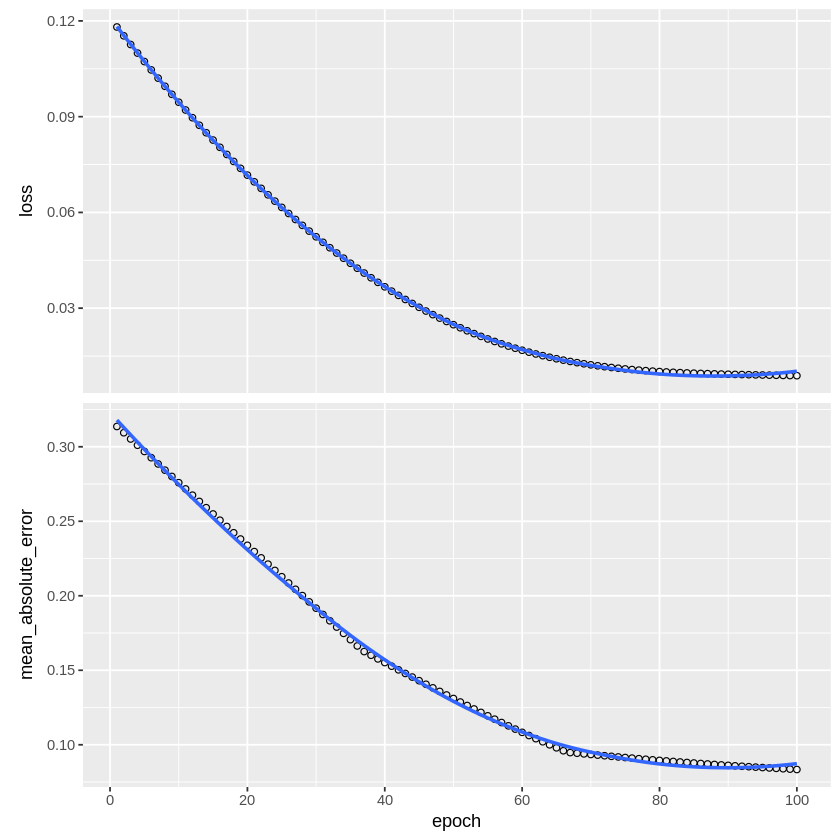

In [29]:
# Training, Evaluation & Results

history = model %>% fit(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y,
  epochs = 100,
  batch_size = 64
)

# Evaluate the model
results = model %>% evaluate(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)

print(results)

In [30]:
model %>% evaluate(sequential_df_scaled_final_test$X,  sequential_df_scaled_final_test$y, verbose = 2)

$loss
[1] 0.1872022

$mean_absolute_error
[1] 0.4326687

In [31]:
model %>% predict(sequential_df_scaled_final_train$X)

0.2628773
0.3037867
0.3456635
0.3884466


In [33]:
# model$get_weights()

In [34]:
denormalize = function(x, min_x, max_x) {
  return (x * (max_x - min_x) + min_x)
}

# Denormalization for visualization

min_sale = min(df$sequential_data, na.rm = TRUE)
max_sale = max(df$sequential_data, na.rm = TRUE)

predictions = model %>% predict(sequential_df_scaled_final_train$X)

denormalized_predictions = denormalize(predictions, min_sale, max_sale)
denormalized_actuals = denormalize(sequential_df_scaled_final_train$y, min_sale, max_sale)

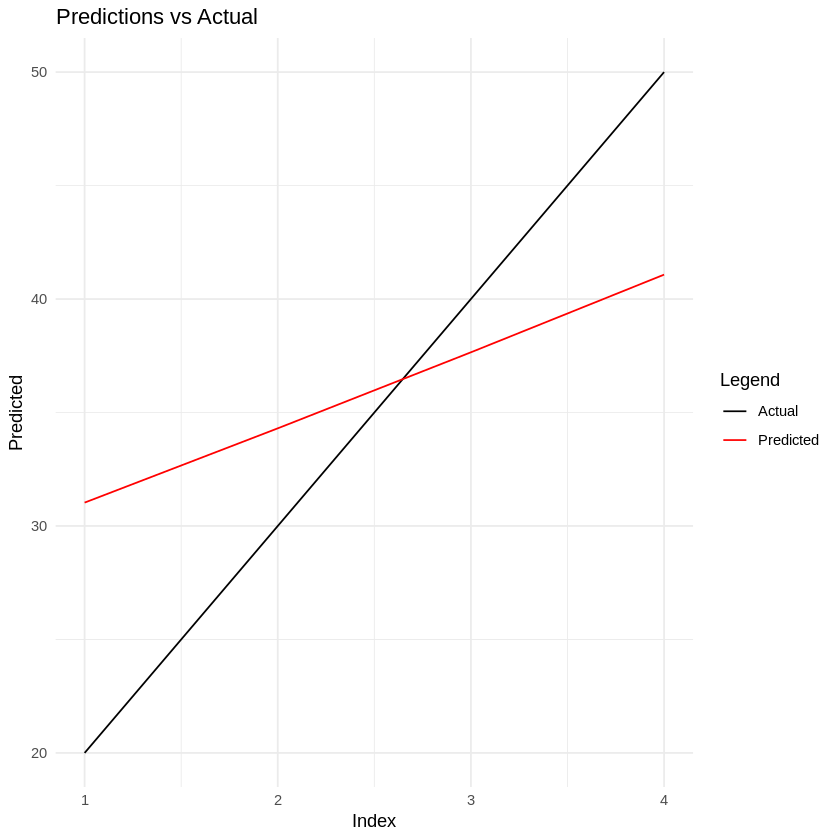

In [35]:
library(ggplot2)

# Visualization of the results of the model

plot_data = data.frame(
  Index = 1:length(denormalized_actuals),
  Actual = denormalized_actuals,
  Predicted = denormalized_predictions
)

ggplot(plot_data, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Predictions vs Actual",
       x = "Index",
       y = "Predicted") +
  scale_color_manual(name = "Legend", values = c("Actual" = "Black", "Predicted" = "red")) +
  theme_minimal()

In [36]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model |> save_model("my_lstm_tmodel.keras")

In [37]:
summary(model)

Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                     │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 31,355 (122.48 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 20,904 (81.66 KB)


In [38]:
# It can be used to reconstruct the model identically.
reconstructed_model <- load_model("my_lstm_tmodel.keras")

In [39]:
summary(reconstructed_model)

Model: "sequential_1"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                     │ (None, 50)               │        10,400 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 31,355 (122.48 KB)
 Trainable params: 10,451 (40.82 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 20,904 (81.66 KB)


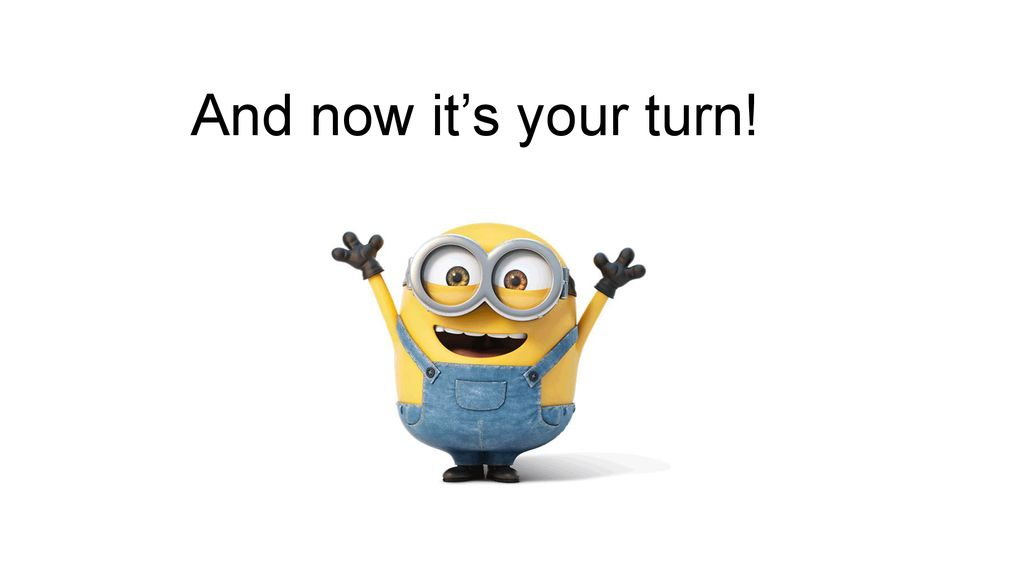

## **Exercise 1: Implementing an LSTM for Time Series Forecasting**
**Objective:**

In this exercise, you will build and train a LSTM for time series forecasting.

In [40]:
# Load the dplyr library
library(dplyr)
library(lubridate)
library(purrr) # This line is added to load the purrr library.

# Load the data
data <- read.csv("https://raw.githubusercontent.com/deepshamenghani/time-series-regression-tidymodels/refs/heads/main/data/timeseries_data_single_storeproduct.csv")

df <- data %>% select(-date)
head(df)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard




,sales
,<int>
1,801
2,810
3,818
4,796
5,808
6,812


In [41]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
df_scaled = as.data.frame(lapply(df, normalize))
head(df_scaled)

,sales
,<dbl>
1,0.3085714
2,0.3600000
3,0.4057143
4,0.2800000
5,0.3485714
6,0.3714286


In [42]:
# 2. Split the data into training and testing sets
splits_train_test <- initial_time_split(df_scaled, prop = 0.8)
data_scaled_test = testing(splits_train_test)

splits_train_valid <- initial_time_split(training(splits_train_test), prop = 0.8)
data_scaled_train = training(splits_train_valid)
data_scaled_valid = testing(splits_train_valid)

dim(data_scaled_train)
dim(data_scaled_valid)
dim(data_scaled_test)

[1] 2336    1

[1] 585   1

[1] 731   1

In [43]:
n_timesteps = 7

sequential_df_scaled_final_train <- univar_rnn_input(data_scaled_train$sales, n_timesteps)
sequential_df_scaled_final_valid <- univar_rnn_input(data_scaled_valid$sales, n_timesteps)
sequential_df_scaled_final_test <- univar_rnn_input(data_scaled_test$sales, n_timesteps)

In [44]:
ncol(sequential_df_scaled_final_train$X)

[1] 7

In [45]:
n_timesteps = 7
n_features = 1

In [46]:
# Model

model = keras_model_sequential() %>%
  layer_simple_rnn(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = FALSE) %>%
  layer_dense(units = 1)

model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

summary(model)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)            │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 2,651 (10.36 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)


Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)            │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)
$loss
[1] 0.003807056

$mean_absolute_error
[1] 0.04886588



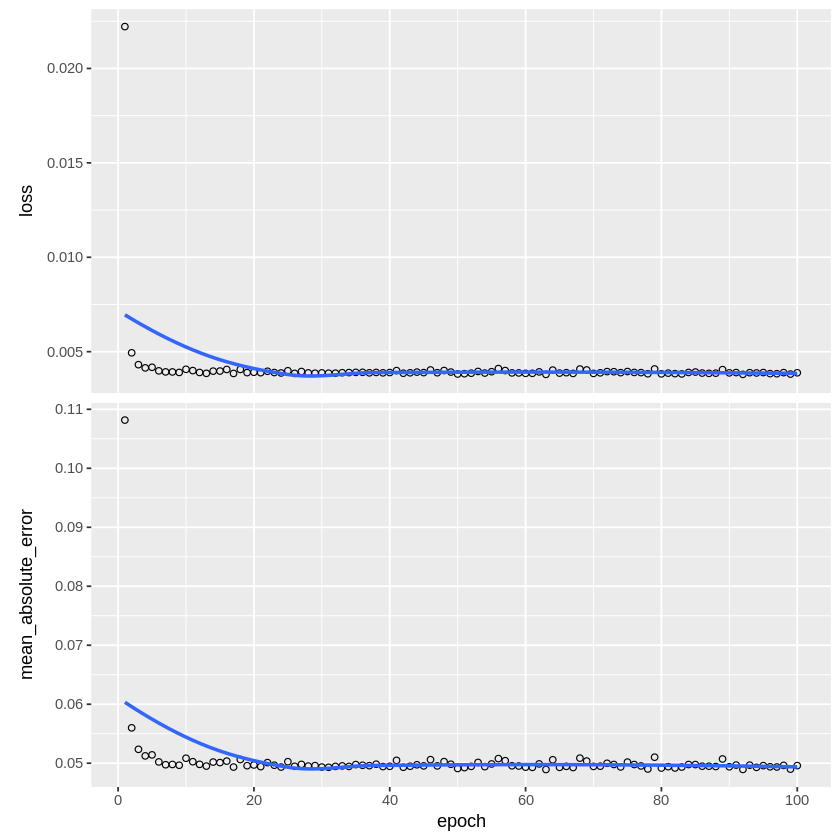

In [47]:
# Training, Evaluation & Results

history = model %>% fit(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y,
  epochs = 100,
  batch_size = 64
)

# Evaluate the model
results = model %>% evaluate(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y
)

# View Model Summary
summary(model)

# Plot Training History
plot(history)

print(results)

In [48]:
model %>% evaluate(sequential_df_scaled_final_test$X,  sequential_df_scaled_final_test$y, verbose = 2)

$loss
[1] 0.004069159

$mean_absolute_error
[1] 0.05032003

In [49]:
model %>% predict(sequential_df_scaled_final_train$X)

0.3815348
0.3855372
0.3992443
0.4091022
0.4406599
0.4549810
0.4591349
0.4380229
0.4562558
0.4739992
0.4695833


In [50]:
# model$get_weights()

In [51]:
denormalize = function(x, min_x, max_x) {
  return (x * (max_x - min_x) + min_x)
}

# Denormalization for visualization

min_sale = min(df$sales, na.rm = TRUE)
max_sale = max(df$sales, na.rm = TRUE)

predictions = model %>% predict(sequential_df_scaled_final_train$X)

denormalized_predictions = denormalize(predictions, min_sale, max_sale)
denormalized_actuals = denormalize(sequential_df_scaled_final_train$y, min_sale, max_sale)

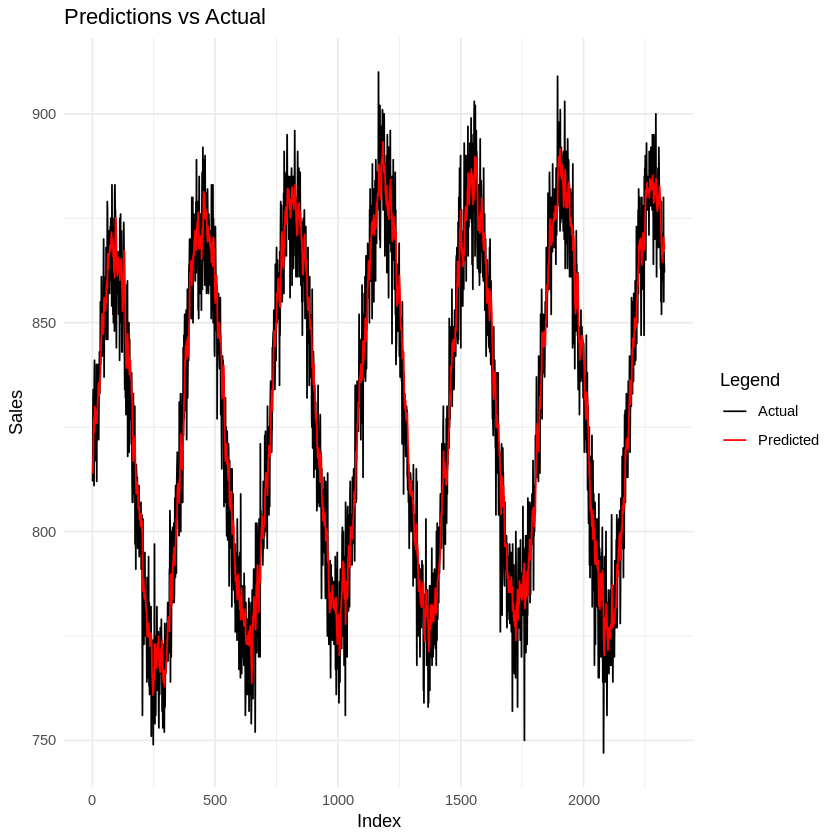

In [52]:
library(ggplot2)

# Visualization of the results of the model

plot_data = data.frame(
  Index = 1:length(denormalized_actuals),
  Actual = denormalized_actuals,
  Predicted = denormalized_predictions
)

ggplot(plot_data, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Predictions vs Actual",
       x = "Index",
       y = "Sales") +
  scale_color_manual(name = "Legend", values = c("Actual" = "Black", "Predicted" = "red")) +
  theme_minimal()

In [53]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model |> save_model("sales_lstm_tmodel.keras")

In [54]:
summary(model)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)            │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)


In [55]:
# It can be used to reconstruct the model identically.
reconstructed_model <- load_model("sales_lstm_tmodel.keras")

In [56]:
summary(reconstructed_model)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)            │ (None, 50)               │         2,600 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_2 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 7,955 (31.08 KB)
 Trainable params: 2,651 (10.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 5,304 (20.72 KB)


## **Exercise 2: Implementing an RNN for Time Series Forecasting**
**Objective:**

In this exercise, you will build and train a Recurrent Neural Network (RNN) for time series forecasting.

In [57]:
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’




Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is n

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2019-04-29  15.72400  16.26533 15.47800   16.09800   250717500      16.09800
2019-04-30  16.13733  16.28067 15.80000   15.91267   141969000      15.91267
2019-05-01  15.92333  16.00000 15.43333   15.60067   160566000      15.60067
2019-05-02  16.36800  16.47533 15.84800   16.27333   272389500      16.27333
2019-05-03  16.25733  17.10733 16.23267   17.00200   355602000      17.00200
2019-05-06  16.66800  17.22333 16.56667   17.02267   162508500      17.02267

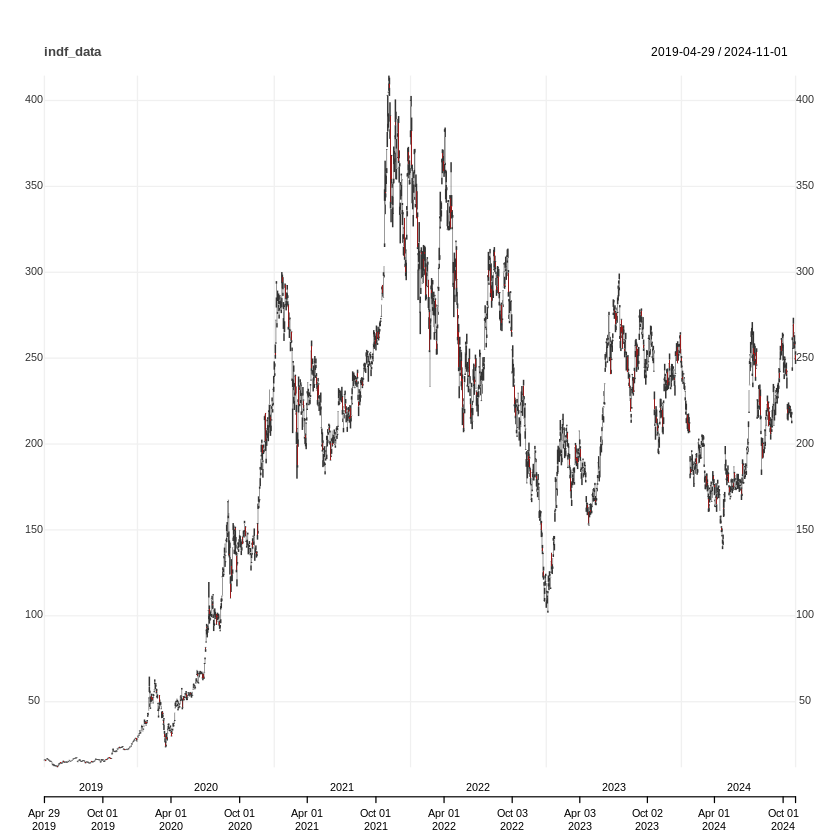

In [58]:
library(quantmod)

# load dataset
indf_data <- getSymbols(Symbols = "TSLA", src = "yahoo", from = Sys.Date() - 2017,
                        to = Sys.Date(), auto.assign = FALSE)
indf_data <- na.omit(indf_data)
head(indf_data)
chart_Series(indf_data, col = "black")

In [59]:
library(dplyr)
library(slider)
library(tidyr)

# Step 1: Load and Preprocess Data
indf_data <- as.data.frame(indf_data) %>%
  mutate(
    # 5-day lag
    lag_5 = lag(TSLA.Close, 5),  # Lag of 5 days to observe the influence of previous data points

    # 10-day rolling mean
    rolling_mean_10 = slide_dbl(TSLA.Close, mean, .before = 9, .complete = TRUE),  # 10-day rolling mean

    # 10-day rolling standard deviation
    rolling_sd_10 = slide_dbl(TSLA.Close, sd, .before = 9, .complete = TRUE),  # 10-day rolling standard deviation

    # Difference from 10-day rolling mean
    rolling_diff_10 = TSLA.Close - rolling_mean_10
  ) %>%
  drop_na()

  head(indf_data)

,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted,lag_5,rolling_mean_10,rolling_sd_10,rolling_diff_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-05-10,15.98333,16.13267,15.73467,15.96800,105124500,15.96800,17.00200,16.28027,0.4545884,-0.3122663
2019-05-13,15.46733,15.49800,14.96667,15.13400,162522000,15.13400,17.02267,16.18387,0.5819157,-1.0498670
2019-05-14,15.28667,15.63333,15.20000,15.48733,108786000,15.48733,16.47067,16.14133,0.6183447,-0.6540001
2019-05-15,15.28800,15.49600,15.01667,15.46333,109440000,15.46333,16.32267,16.12760,0.6330376,-0.6642669
2019-05-16,15.29933,15.40000,15.10000,15.22200,112249500,15.22200,16.13200,16.02247,0.6908106,-0.8004666
2019-05-17,14.79733,14.81600,13.92800,14.06867,266800500,14.06867,15.96800,15.72913,0.8361535,-1.6604660


In [60]:
normalize = function(x) {
  return ((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

# Rescale numeric columns
indf_data_scaled = as.data.frame(lapply(indf_data[, c('TSLA.Close', 'lag_5', 'rolling_mean_10', 'rolling_sd_10', 'rolling_diff_10')], normalize))

In [61]:
head(indf_data_scaled)

,TSLA.Close,lag_5,rolling_mean_10,rolling_sd_10,rolling_diff_10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.010141396,0.01273913,0.009756936,0.007494189,0.3956227
2,0.008046121,0.01279105,0.009496674,0.010796785,0.3891953
3,0.008933807,0.01140425,0.009381842,0.011741675,0.3926448
4,0.008873511,0.01103243,0.009344765,0.012122778,0.3925554
5,0.008267206,0.01055342,0.009060925,0.013621284,0.3913686
6,0.005369666,0.01014140,0.008268980,0.017391167,0.3838746


[1] 883   5

[1] 221   5

[1] 277   5

Model: "sequential_3"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)          │ (None, 50)               │         2,800 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_3 (Dense)                   │ (None, 1)                │            51 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘
 Total params: 2,851 (11.14 KB)
 Trainable params: 2,851 (11.14 KB)
 Non-trainable params: 0 (0.00 B)
Model: "sequential_3"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)          │ (None,

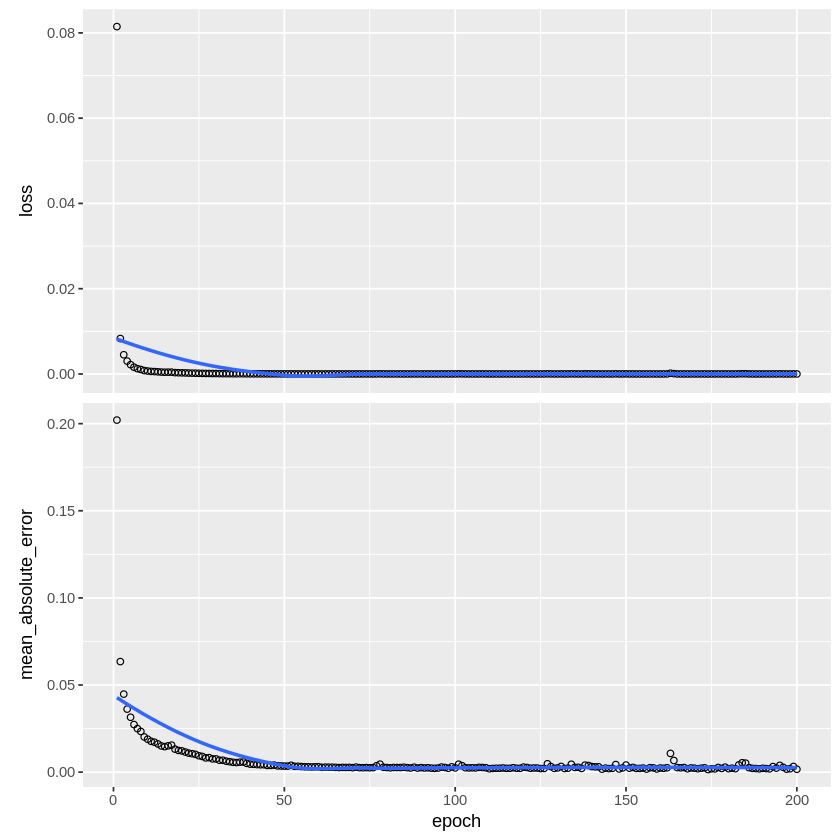

In [62]:
# Step 2: Split the Data into Training and Testing Sets
# Split data sequentially for time-series analysis
splits_train_test <- initial_time_split(indf_data_scaled, prop = 0.8)
data_scaled_test = testing(splits_train_test)

# Further split the training data into training and validation sets
splits_train_valid <- initial_time_split(training(splits_train_test), prop = 0.8)
data_scaled_train = training(splits_train_valid)
data_scaled_valid = testing(splits_train_valid)

# View the dimensions of training, validation, and testing sets
dim(data_scaled_train)
dim(data_scaled_valid)
dim(data_scaled_test)

# Step 3: Prepare Input Sequences for LSTM Model
multivar_rnn_input = function(data, sequence_length, target_column) {

  # Initialize x as a 3D array to hold input sequences. Dimensions:
  # - First dimension: number of sequences (rows of data - sequence length + 1)
  # - Second dimension: length of each sequence (sequence_length)
  # - Third dimension: number of features (columns in data)
  x = array(dim = c(nrow(data) - sequence_length + 1, sequence_length, ncol(data)))

  # Initialize y as a 2D array to hold target values corresponding to each sequence
  # - First dimension: number of sequences
  # - Second dimension: 1, as it holds a single target value for each sequence
  y = array(dim = c(nrow(data) - sequence_length + 1, 1))

  # Loop over each possible sequence start position in the data
  for (i in 1:(nrow(data) - sequence_length + 1)) {
    # For each position, extract a sequence of rows from i to (i + sequence_length - 1)
    # Convert these rows to a matrix and assign to the ith position in x
    x[i, , ] = as.matrix(data[i:(i + sequence_length - 1), ])

    # Assign the target value at the end of the sequence to the ith position in y
    y[i] = data[i + sequence_length - 1, target_column]
  }

  # Return the list containing the input sequences (x) and corresponding target values (y)
  return(list(X = x, y = y))
}

# Set the number of time steps
n_timesteps = 7
# Convert scaled data to sequential format required for LSTM
sequential_df_scaled_final_train <- multivar_rnn_input(data_scaled_train, n_timesteps, "TSLA.Close")
sequential_df_scaled_final_valid <- multivar_rnn_input(data_scaled_valid, n_timesteps, "TSLA.Close")
sequential_df_scaled_final_test <- multivar_rnn_input(data_scaled_test, n_timesteps, "TSLA.Close")

# Step 4: Build LSTM Model
# Create a sequential LSTM model
n_features = 5

model = keras_model_sequential() %>%
  layer_simple_rnn(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = FALSE) %>%
  layer_dense(units = 1)


# model <- keras_model_sequential() %>%
#   layer_simple_rnn(units = 50, input_shape = c(n_timesteps, n_features), return_sequences = TRUE) %>%  # Set return_sequences to TRUE to allow stacking RNN layers
#   layer_simple_rnn(units = 30, return_sequences = FALSE) %>%  # Additional RNN layer
#   layer_dense(units = 10, activation = 'relu') %>%  # Dense layer
#   layer_dense(units = 1)  # Output layer



# Compile the model
# Configure the model with Adam optimizer and mean squared error loss for regression
model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

# View the model summary
summary(model)

# Step 5: Train the LSTM Model
# Fit the LSTM model using the training dataset to minimize error over multiple epochs
history = model %>% fit(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y,
  epochs = 200,
  batch_size = 32
)

# Step 6: Evaluate the Model
# Evaluate the trained model's performance on the training dataset
results = model %>% evaluate(
  x = sequential_df_scaled_final_train$X,
  y = sequential_df_scaled_final_train$y
)

# View Model Summary and Plot Training History
summary(model)
plot(history)

print(results)

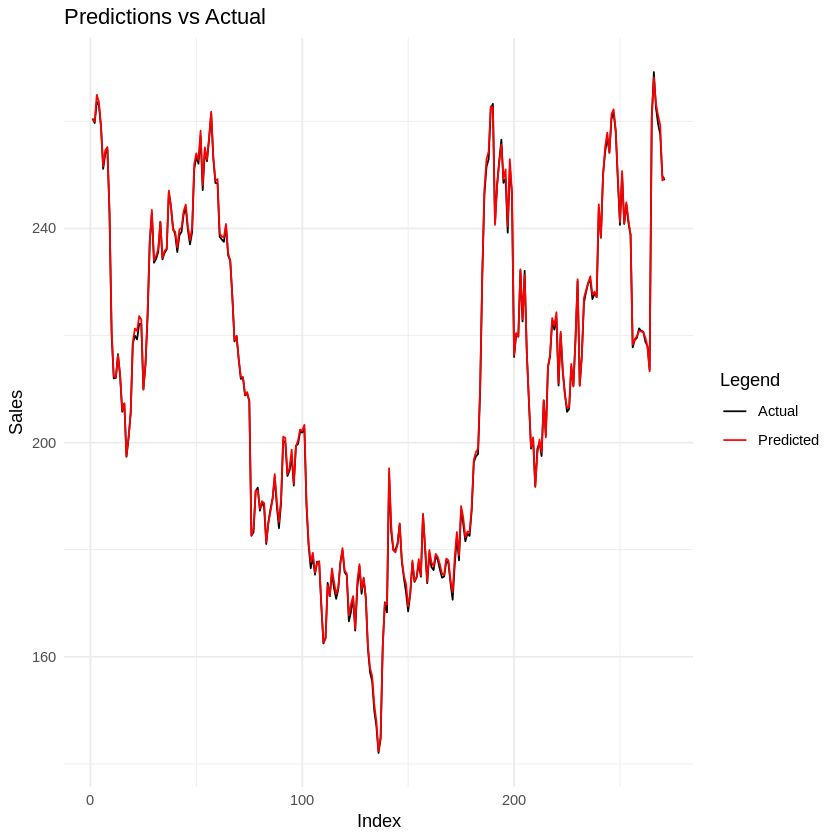

In [63]:
# Step 7: Denormalize and Visualize Predictions
# Denormalize the predictions to obtain sales values in the original range
denormalize = function(x, min_x, max_x) {
  return (x * (max_x - min_x) + min_x)
}

# Denormalization for visualization
min_target = min(as.data.frame(indf_data$TSLA.Close), na.rm = TRUE)
max_target = max(as.data.frame(indf_data$TSLA.Close), na.rm = TRUE)

predictions = model %>% predict(sequential_df_scaled_final_test$X)

denormalized_predictions = denormalize(predictions, min_target, max_target)
denormalized_actuals = denormalize(sequential_df_scaled_final_test$y, min_target, max_target)


# Visualization of the results of the model
library(ggplot2)
plot_data = data.frame(
  Index = 1:length(denormalized_actuals),
  Actual = denormalized_actuals,
  Predicted = denormalized_predictions
)

ggplot(plot_data, aes(x = Index)) +
  geom_line(aes(y = Actual, color = "Actual")) +
  geom_line(aes(y = Predicted, color = "Predicted")) +
  labs(title = "Predictions vs Actual",
       x = "Index",
       y = "Sales") +
  scale_color_manual(name = "Legend", values = c("Actual" = "Black", "Predicted" = "red")) +
  theme_minimal()

# # Step 8: Save and Reconstruct the Model
# # Save and reload the model to ensure reproducibility and persistence of trained parameters
# model |> save_model("sales_rnn_tmodel2.keras")
# reconstructed_model <- load_model("sales_rnn_tmodel2.keras")